In [4]:
# Import all dependencies
import numpy as np
import json
import requests
from pprint import pprint
from config import weather_api_key
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# Create the list of Lattitude & Lognitude bands we need to extract the data
lat_lng_bnds = ["-180,0,180,30,6", "-180,30,180,60,6", "-180,60,180,90,6", 
               "-180,-30,180,0,6", "-180,-90,180,-30,6"]


cities_weather = pd.DataFrame()

In [15]:
for bnd in lat_lng_bnds:
    #p['bbox'] = bnd --- does'nt work
    bbox_url = "http://api.openweathermap.org/data/2.5/box/city?appid="+ weather_api_key + "&bbox=" + bnd + "&units=Imperial"
    
    r = requests.get(bbox_url)
    print(f"{r.url}")
    print(r)
    
    
    
    if(r.status_code == 200):
        json_data = r.json()
        
        if(len(json_data) > 0 and json_data['cod'] == 200):
            cities_weather = cities_weather.append(json_normalize(json_data['list']), sort=False) 
    else:
        print(f"{r.url} errored out with status code : {r.status_code}")

http://api.openweathermap.org/data/2.5/box/city?appid=216a25d1e5fc1da2b798d855ba143d3b&bbox=-180,0,180,30,6&unit=imperial
<Response [200]>
http://api.openweathermap.org/data/2.5/box/city?appid=216a25d1e5fc1da2b798d855ba143d3b&bbox=-180,30,180,60,6&unit=imperial
<Response [200]>
http://api.openweathermap.org/data/2.5/box/city?appid=216a25d1e5fc1da2b798d855ba143d3b&bbox=-180,60,180,90,6&unit=imperial
<Response [200]>
http://api.openweathermap.org/data/2.5/box/city?appid=216a25d1e5fc1da2b798d855ba143d3b&bbox=-180,-30,180,0,6&unit=imperial
<Response [200]>
http://api.openweathermap.org/data/2.5/box/city?appid=216a25d1e5fc1da2b798d855ba143d3b&bbox=-180,-90,180,-30,6&unit=imperial
<Response [200]>


In [16]:
cities_weather.count()


clouds.today       2408
coord.Lat          2408
coord.Lon          2408
dt                 2408
id                 2408
main.humidity      2408
main.pressure      2408
main.temp          2408
main.temp_max      2408
main.temp_min      2408
name               2408
weather            2408
wind.deg           2408
wind.speed         2408
main.grnd_level     501
main.sea_level      501
rain                  0
rain.1h              12
rain.3h              66
snow                  0
dtype: int64

In [17]:
# drop NAN values
cities_weather.dropna(how = 'any', axis = 1, inplace = True) if(cities_weather.isnull().values.sum()>0) else print("No NAN values")

cities_weather_fnl = cities_weather[['name','coord.Lat','coord.Lon','dt','main.temp_max','main.humidity','clouds.today','wind.speed']]

cities_weather_fnl.rename(columns = {'name':'City','coord.Lat':'Lat','coord.Lon':'Lon','dt':'Date (UTC)',\
                                     'main.temp_max':'Max Temperature','main.humidity':'Humidity','clouds.today':'Cloudiness', \
                                     'wind.speed':'Wind Speed'}, inplace = True)
cities_weather_fnl.head()

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,City,Lat,Lon,Date (UTC),Max Temperature,Humidity,Cloudiness,Wind Speed
0,Honolulu,21.306940,-157.858337,1546643417,28.30,54,40,8.70
1,Hilo,19.729719,-155.089996,1546643005,25.60,57,75,4.10
2,Santa Isabel,28.383329,-113.349998,1546643022,18.88,26,0,0.56
3,Autlan de Navarro,19.766670,-104.366669,1546643149,24.41,42,0,1.06
4,Guadalajara,20.666670,-103.333328,1546643145,24.00,25,90,0.86


In [18]:
#if city names are duplicated, drop the records
if (cities_weather_fnl.duplicated(['City']).sum() > 0):
    cities_weather_fnl.drop_duplicates(['City'], inplace=True)

cities_weather_fnl.count()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


City               1194
Lat                1194
Lon                1194
Date (UTC)         1194
Max Temperature    1194
Humidity           1194
Cloudiness         1194
Wind Speed         1194
dtype: int64

In [19]:
# convert UTC date to readable date format
cities_weather_fnl['Formatted Date'] = cities_weather_fnl['Date (UTC)'].apply(lambda d : datetime.utcfromtimestamp(int(d))\
                                                                              .strftime("%m/%d/%Y"))

cities_weather_fnl.head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City,Lat,Lon,Date (UTC),Max Temperature,Humidity,Cloudiness,Wind Speed,Formatted Date
0,Honolulu,21.306940,-157.858337,1546643417,28.30,54,40,8.70,01/04/2019
1,Hilo,19.729719,-155.089996,1546643005,25.60,57,75,4.10,01/04/2019
2,Santa Isabel,28.383329,-113.349998,1546643022,18.88,26,0,0.56,01/04/2019
3,Autlan de Navarro,19.766670,-104.366669,1546643149,24.41,42,0,1.06,01/04/2019
4,Guadalajara,20.666670,-103.333328,1546643145,24.00,25,90,0.86,01/04/2019


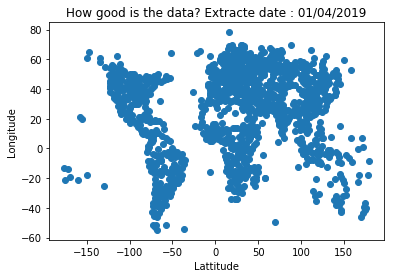

In [20]:
plt.scatter('Lon','Lat', data = cities_weather_fnl)
plt.title(f"How good is the data? Extracte date : {cities_weather_fnl['Formatted Date'].max()}")
plt.xlabel("Lattitude")
plt.ylabel("Longitude")
plt.show()

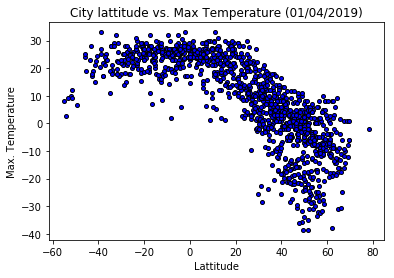

In [21]:
plt.scatter('Lat','Max Temperature', data=cities_weather_fnl,s = 16, facecolors = 'blue', edgecolors = 'black' )
plt.title(f"City lattitude vs. Max Temperature ({cities_weather_fnl['Formatted Date'].max()})")
plt.xlabel("Lattitude")
plt.ylabel('Max. Temperature')
plt.show()

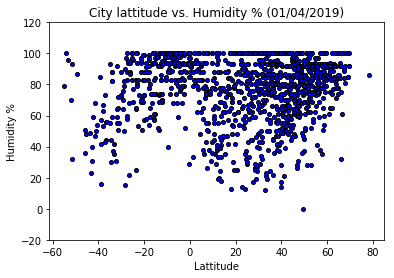

In [13]:
plt.scatter('Lat','Humidity', data=cities_weather_fnl,s = 16, facecolors = 'blue', edgecolors = 'black' )
plt.title(f"City lattitude vs. Humidity % ({cities_weather_fnl['Formatted Date'].max()})")
plt.xlabel("Lattitude")
plt.ylabel('Humidity %')
plt.ylim(-20, 120, 10)
plt.show()

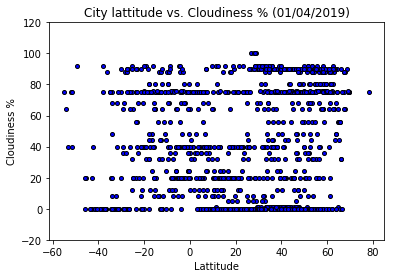

In [115]:
plt.scatter('Lat','Cloudiness', data=cities_weather_fnl,s = 16, facecolors = 'blue', edgecolors = 'black' )
plt.title(f"City lattitude vs. Cloudiness % ({cities_weather_fnl['Formatted Date'].max()})")
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness %')
plt.ylim(-20, 120, 10)
plt.show()

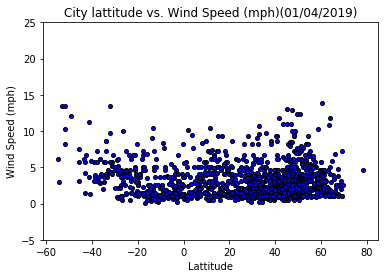

In [14]:
plt.scatter('Lat','Wind Speed', data=cities_weather_fnl,s = 16, facecolors = 'blue', edgecolors = 'black' )
plt.title(f"City lattitude vs. Wind Speed (mph)({cities_weather_fnl['Formatted Date'].max()})")
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed (mph)')
plt.ylim(-5, 25, 0.5)
plt.show()